# PROJECT CODE

- ***Name: Lam Nhut Thinh***
- ***Student ID: K194141751***

# IMPORT LIBRARIES

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import tree
from sklearn import neighbors
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

# READ AND PREPROCESS THE DATA

***READ THE DATA***

In [211]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
path = "gdrive/My Drive/Đồ án tốt nghiệp"

Mounted at /content/gdrive


In [212]:
df = pd.read_csv('gdrive/MyDrive/Đồ án tốt nghiệp/final_data.csv')
df

,NAME,EBIT(t-1),PB(t-1),QR(t-1),DA(t-1),TATO(t-1),ROS(t-1),OCFTD(t-1),EBIT(t-2),PB(t-2),QR(t-2),DA(t-2),TATO(t-2),ROS(t-2),OCFTD(t-2),TARGET
0,AAA,520.00,1.4,0.9,53.04,0.87,3.81,13.49,822,1.1,1.2,59.25,1.16,5.30,10.33,0
1,AAA,550.00,1.6,1.3,45.50,1.31,2.47,9.75,520,1.4,0.9,53.04,0.87,3.81,13.49,0
2,AAM,-12.00,0.6,3.3,8.06,0.57,-9.92,-141.18,10,0.6,4.9,7.02,0.95,3.70,-168.75,1
3,AAM,0.33,0.7,14.1,3.48,0.67,0.17,642.86,-12,0.6,3.3,8.06,0.57,-9.92,-141.18,0
4,ABR,30.00,2.1,4.6,16.31,0.35,25.51,50.00,11,1.1,3.8,18.22,0.10,29.63,-165.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,VTO,123.00,0.5,1.2,38.35,0.65,6.00,41.46,163,0.4,0.9,41.30,0.77,6.53,37.87,0
706,VTO,188.00,0.8,1.8,34.62,0.54,13.64,38.82,123,0.5,1.2,38.35,0.65,6.00,41.46,0
707,YBM,31.00,0.7,0.9,58.94,1.13,3.04,13.62,31,0.5,0.8,58.95,1.02,3.05,13.36,0
708,YEG,-164.00,1.7,2.0,36.46,0.88,-14.77,-84.75,-369,1.2,2.2,32.61,0.96,-26.38,-79.55,0


***FILTER OUT FINANCIAL FIRMS***

In [213]:
df_final = df.set_index('NAME')

In [214]:
# financial_firms = ['ACB','AGR','APG','BIC','BID','BMI','BSI','BVH','CTG','CTS','EIB','EVF','FTS']

In [215]:
# non_financial_firms = []
# for i in df.index:
#     if not i in financial_firms:
#         non_financial_firms.append(i)

In [216]:
# df = df.loc[non_financial_firms,:]
# df

In [217]:
df_final.columns

Index(['EBIT(t-1)', 'PB(t-1)', 'QR(t-1)', 'DA(t-1)', 'TATO(t-1)', 'ROS(t-1)',
       'OCFTD(t-1)', 'EBIT(t-2)', 'PB(t-2)', 'QR(t-2)', 'DA(t-2)', 'TATO(t-2)',
       'ROS(t-2)', 'OCFTD(t-2)', 'TARGET'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS (EDA)

***BASIC STATS OF THE VARIABLES***

In [218]:
df_final.describe()

,EBIT(t-1),PB(t-1),QR(t-1),DA(t-1),TATO(t-1),ROS(t-1),OCFTD(t-1),EBIT(t-2),PB(t-2),QR(t-2),DA(t-2),TATO(t-2),ROS(t-2),OCFTD(t-2),TARGET
count,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000
mean,762.199056,1.924366,1.943803,47.419465,0.859310,0.241268,22.033000,680.940845,1.465352,1.791408,47.566155,0.916197,8.297549,28.072155,0.091549
std,3425.484957,2.003118,3.856357,20.678359,0.875205,221.727919,98.282757,2770.914329,1.353066,3.006729,20.694040,0.930721,51.831091,97.265505,0.288592
min,-12158.000000,-5.300000,0.100000,0.540000,-0.050000,-5800.000000,-335.290000,-10034.000000,-5.300000,0.100000,0.000000,0.000000,-673.080000,-254.550000,0.000000
25%,41.000000,1.000000,0.700000,31.260000,0.272500,2.012500,-3.712500,39.000000,0.700000,0.700000,32.140000,0.320000,2.217500,-0.195000,0.000000
50%,127.500000,1.500000,1.100000,47.930000,0.655000,6.100000,7.730000,126.500000,1.100000,1.100000,47.895000,0.720000,6.080000,11.255000,0.000000
75%,432.500000,2.300000,1.800000,64.382500,1.097500,15.155000,26.907500,360.750000,1.800000,1.700000,63.875000,1.157500,15.105000,31.927500,0.000000
max,50531.000000,34.000000,62.700000,126.100000,8.160000,204.170000,1700.000000,39519.000000,18.100000,42.800000,129.400000,8.160000,620.000000,1365.000000,1.000000


***PIE CHART OF TARGET VARIABLE***

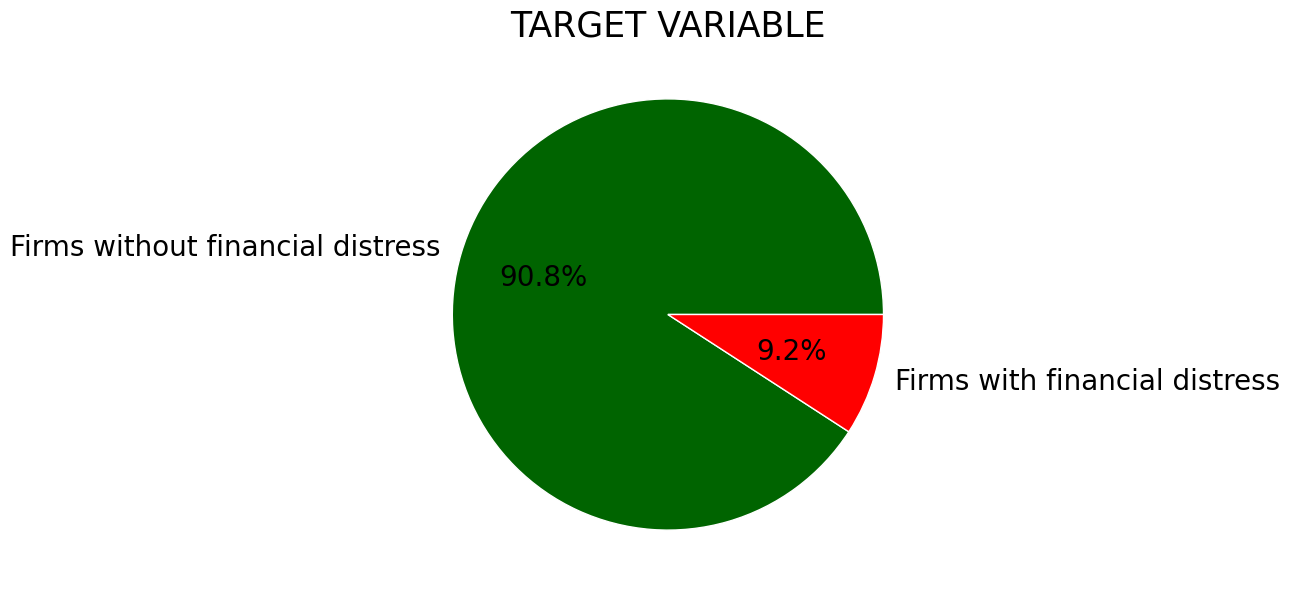

In [219]:
fig = plt.figure(figsize =(10, 7))
plt.pie(df_final['TARGET'].value_counts(),
        labels = ["Firms without financial distress","Firms with financial distress"],
        colors = ['Darkgreen','r'],
        autopct='%.1f%%' ,textprops={'fontsize': 20},
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('TARGET VARIABLE',fontsize = 25);

***BOX PLOT OF INDEPENDENT VARIABLES***

In [220]:
# distress = df_final[['EBIT(t-1)','PB(t-1)','QR(t-1)','DA(t-1)','TATO(t-1)','ROS(t-1)','OCFTD(t-1)','TARGET']]['TARGET'].map({1:'Distress',0:'No Distress'})
# for feature in df_final.columns[:-1]:
#     plt.subplots(figsize=(7,5))
#     sns.boxplot(y=df_final[feature],x = distress)
#     plt.title(f'{feature.upper()} BOX PLOT')
#     plt.show()

***CORRELATION MATRIX OF THE VARIABLES***

In [221]:
# sns.pairplot(df_final[['QR(t-1)','OCFTD(t-1)','TARGET']])

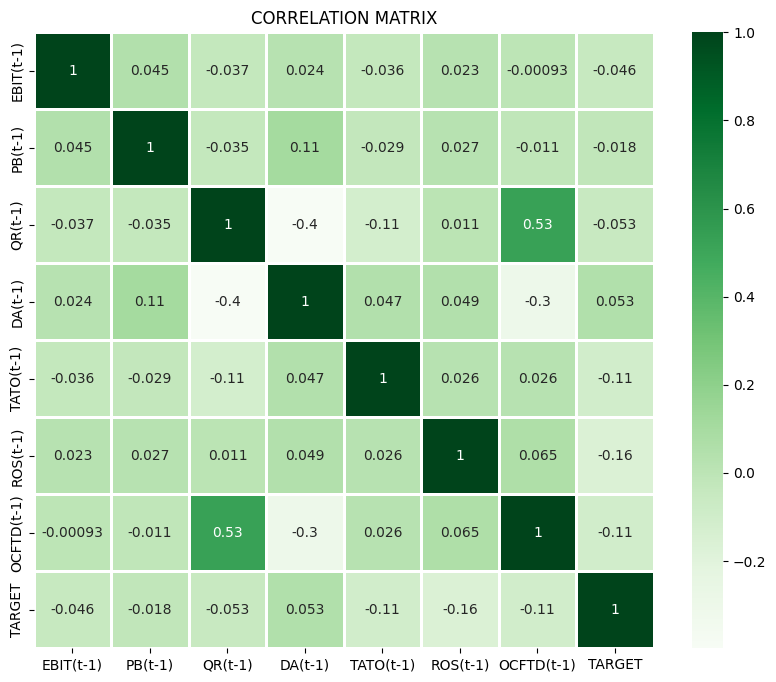

In [222]:
plt.figure(figsize=(10,8))
sns.heatmap(df_final[['EBIT(t-1)','PB(t-1)','QR(t-1)','DA(t-1)','TATO(t-1)','ROS(t-1)','OCFTD(t-1)','TARGET']].corr(),annot=True,cmap = 'Greens',linewidths=1)
plt.title('CORRELATION MATRIX')
plt.show()

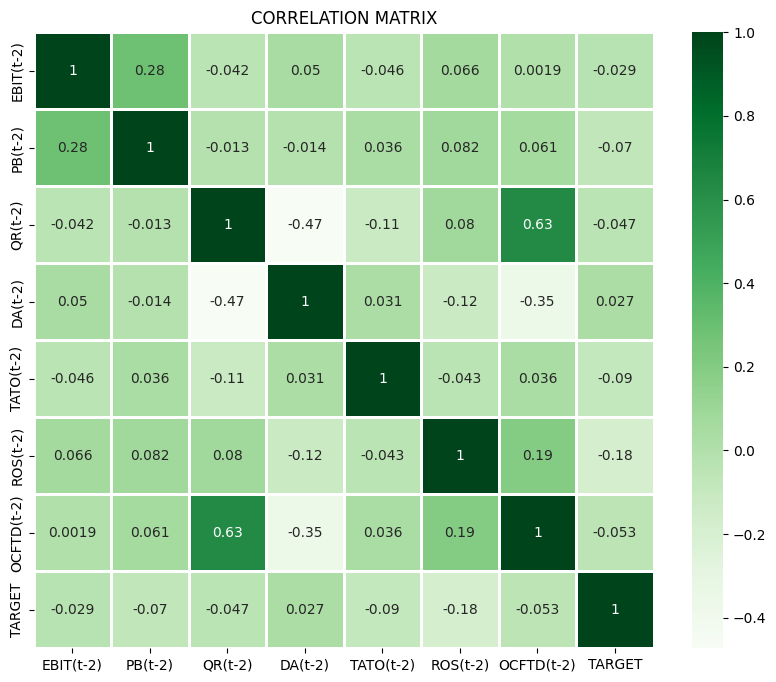

In [223]:
plt.figure(figsize=(10,8))
sns.heatmap(df_final[['EBIT(t-2)','PB(t-2)','QR(t-2)','DA(t-2)','TATO(t-2)','ROS(t-2)','OCFTD(t-2)','TARGET']].corr(),annot=True,cmap = 'Greens',linewidths=1)
plt.title('CORRELATION MATRIX')
plt.show()

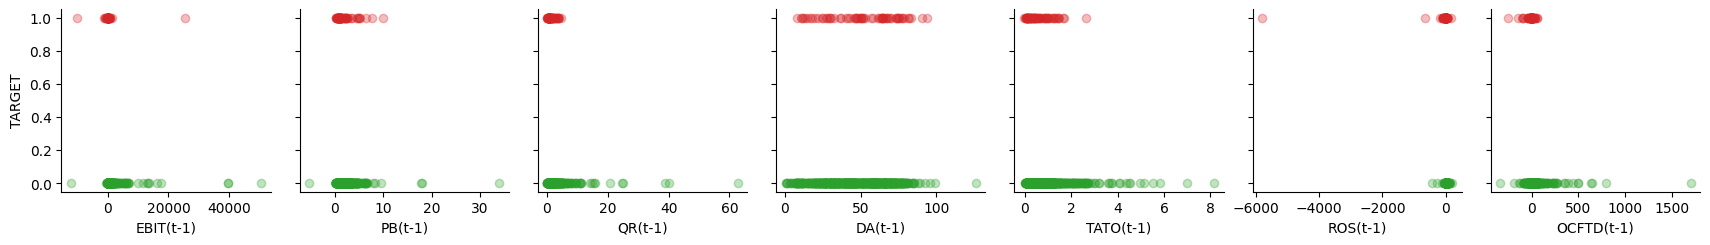

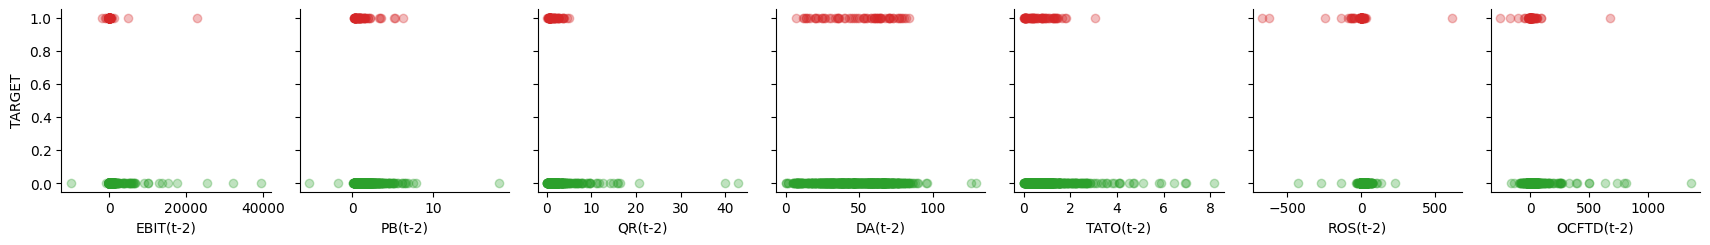

In [224]:
g = sns.PairGrid(df_final[['EBIT(t-1)','PB(t-1)','QR(t-1)','DA(t-1)','TATO(t-1)','ROS(t-1)','OCFTD(t-1)','TARGET']], y_vars='TARGET',
                 x_vars=list(df_final[['EBIT(t-1)','PB(t-1)','QR(t-1)','DA(t-1)','TATO(t-1)','ROS(t-1)','OCFTD(t-1)','TARGET']].columns[:-1]), hue='TARGET',
                 palette=["C2", "C3"])
g = g.map(plt.scatter,alpha=0.3)
g = sns.PairGrid(df_final[['EBIT(t-2)','PB(t-2)','QR(t-2)','DA(t-2)','TATO(t-2)','ROS(t-2)','OCFTD(t-2)','TARGET']], y_vars='TARGET',
                 x_vars=list(df_final[['EBIT(t-2)','PB(t-2)','QR(t-2)','DA(t-2)','TATO(t-2)','ROS(t-2)','OCFTD(t-2)','TARGET']].columns[:-1]), hue='TARGET',
                 palette=["C2", "C3"])
g = g.map(plt.scatter, alpha=0.3)

In [225]:
df_final[['EBIT(t-1)','PB(t-1)','QR(t-1)','DA(t-1)','TATO(t-1)','ROS(t-1)','OCFTD(t-1)','TARGET']].describe()

,EBIT(t-1),PB(t-1),QR(t-1),DA(t-1),TATO(t-1),ROS(t-1),OCFTD(t-1),TARGET
count,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000
mean,762.199056,1.924366,1.943803,47.419465,0.859310,0.241268,22.033000,0.091549
std,3425.484957,2.003118,3.856357,20.678359,0.875205,221.727919,98.282757,0.288592
min,-12158.000000,-5.300000,0.100000,0.540000,-0.050000,-5800.000000,-335.290000,0.000000
25%,41.000000,1.000000,0.700000,31.260000,0.272500,2.012500,-3.712500,0.000000
50%,127.500000,1.500000,1.100000,47.930000,0.655000,6.100000,7.730000,0.000000
75%,432.500000,2.300000,1.800000,64.382500,1.097500,15.155000,26.907500,0.000000
max,50531.000000,34.000000,62.700000,126.100000,8.160000,204.170000,1700.000000,1.000000


In [226]:
df_final[['EBIT(t-2)','PB(t-2)','QR(t-2)','DA(t-2)','TATO(t-2)','ROS(t-2)','OCFTD(t-2)','TARGET']].describe()

,EBIT(t-2),PB(t-2),QR(t-2),DA(t-2),TATO(t-2),ROS(t-2),OCFTD(t-2),TARGET
count,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000
mean,680.940845,1.465352,1.791408,47.566155,0.916197,8.297549,28.072155,0.091549
std,2770.914329,1.353066,3.006729,20.694040,0.930721,51.831091,97.265505,0.288592
min,-10034.000000,-5.300000,0.100000,0.000000,0.000000,-673.080000,-254.550000,0.000000
25%,39.000000,0.700000,0.700000,32.140000,0.320000,2.217500,-0.195000,0.000000
50%,126.500000,1.100000,1.100000,47.895000,0.720000,6.080000,11.255000,0.000000
75%,360.750000,1.800000,1.700000,63.875000,1.157500,15.105000,31.927500,0.000000
max,39519.000000,18.100000,42.800000,129.400000,8.160000,620.000000,1365.000000,1.000000


# PREDICTIVE MODELS

## SPLITTING THE DATA

In [227]:
# Assign dependent and independent variables
y = df_final['TARGET']
X = df_final.iloc[:,:-1]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

In [228]:
def confusion_matrix_df(y_test,y_pred):
    df = pd.DataFrame(confusion_matrix(y_test,y_pred),
                      columns=['Predict No Distress','Predict Distress'],
                      index=['Actual No Distress','Actual Distress'])
    return df.style.background_gradient(cmap='Greens')

## DECISION TREE CLASSIFIER

***FIT THE DATA AND MAKE PREDICTION***

In [229]:
# pip install --upgrade scikit-learn

In [230]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

my_tree = DecisionTreeClassifier(max_depth = 4,
                                      max_features = 'auto',
                                      min_samples_split = 4,
                                      random_state = 0,
                                      criterion='gini',class_weight = {0:.092, 1:.908})
model_dectree = my_tree.fit(X_train, y_train)
y_pred_dectree = model_dectree.predict(X_test)
y_pred_train_dectree = model_dectree.predict(X_train)
print(classification_report(y_train, y_pred_train_dectree))
print(f'Decision Tree Accuracy Train: {100*round(accuracy_score(y_train, y_pred_train_dectree),2)}%')
confusion_matrix_df(y_train, y_pred_train_dectree)
print(classification_report(y_test, y_pred_dectree))
print(f'Decision Tree Accuracy: {100*round(accuracy_score(y_test, y_pred_dectree),2)}%')
confusion_matrix_df(y_test,y_pred_dectree)

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       513
           1       0.49      0.89      0.63        55

    accuracy                           0.90       568
   macro avg       0.74      0.89      0.78       568
weighted avg       0.94      0.90      0.91       568

Decision Tree Accuracy Train: 90.0%
              precision    recall  f1-score   support

           0       0.99      0.83      0.90       132
           1       0.28      0.90      0.43        10

    accuracy                           0.83       142
   macro avg       0.64      0.86      0.66       142
weighted avg       0.94      0.83      0.87       142

Decision Tree Accuracy: 83.0%


,Predict No Distress,Predict Distress
Actual No Distress,109,23
Actual Distress,1,9


***TUNE THE HYPERPARAMETERS OF THE MODEL***

In [231]:
from sklearn.model_selection import GridSearchCV

tree_param = {'max_depth':[4,5,6],
              'max_features':['auto','sqrt'],
              'min_samples_split':[2,4,6],
              }
grid_dectree = GridSearchCV(DecisionTreeClassifier(random_state = 0,class_weight = {0:.092, 1:.908}), tree_param, cv=5,scoring = 'recall')
grid_dectree.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight={0: 0.092, 1: 0.908},
                                              random_state=0),
             param_grid={'max_depth': [4, 5, 6],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 4, 6]},
             scoring='recall')

In [232]:
grid_dectree.best_params_

{'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 2}

In [233]:
y_pred_grid_dectree=grid_dectree.predict(X_test)
y_pred_grid_dectree_train = grid_dectree.predict(X_train)
print(classification_report(y_train, y_pred_grid_dectree_train))
print(f'Decision Tree Accuracy Train: {100*round(accuracy_score(y_train, y_pred_grid_dectree_train),2)}%')
confusion_matrix_df(y_train, y_pred_grid_dectree_train)
print(classification_report(y_test, y_pred_grid_dectree))
print(f'Decision Tree Accuracy: {100*round(accuracy_score(y_test, y_pred_grid_dectree),2)}%')
confusion_matrix_df(y_test,y_pred_grid_dectree)

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       513
           1       0.49      0.89      0.63        55

    accuracy                           0.90       568
   macro avg       0.74      0.89      0.78       568
weighted avg       0.94      0.90      0.91       568

Decision Tree Accuracy Train: 90.0%
              precision    recall  f1-score   support

           0       0.99      0.83      0.90       132
           1       0.28      0.90      0.43        10

    accuracy                           0.83       142
   macro avg       0.64      0.86      0.66       142
weighted avg       0.94      0.83      0.87       142

Decision Tree Accuracy: 83.0%


,Predict No Distress,Predict Distress
Actual No Distress,109,23
Actual Distress,1,9


In [234]:
dec_pred = y_pred_grid_dectree.tolist()

## RANDOM FOREST CLASSIFIER

***FIT THE DATA AND MAKE PREDICTION***

In [235]:
my_forest = RandomForestClassifier(random_state = 0,class_weight = {0:.092, 1:.908})
model_forest = my_forest.fit(X_train, y_train)
y_pred_forest = model_forest.predict(X_test)
y_pred_forest_train = model_forest.predict(X_train)
print(classification_report(y_train, y_pred_forest_train))
print(f'Random Forest Accuracy Train: {100*round(accuracy_score(y_train, y_pred_forest_train),2)}%')
confusion_matrix_df(y_train, y_pred_forest_train)
print(classification_report(y_test, y_pred_forest))
print(f'Random Forest Accuracy: {100*round(accuracy_score(y_test, y_pred_forest),2)}%')
confusion_matrix_df(y_test,y_pred_forest)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       513
           1       1.00      1.00      1.00        55

    accuracy                           1.00       568
   macro avg       1.00      1.00      1.00       568
weighted avg       1.00      1.00      1.00       568

Random Forest Accuracy Train: 100.0%
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       132
           1       0.57      0.40      0.47        10

    accuracy                           0.94       142
   macro avg       0.76      0.69      0.72       142
weighted avg       0.93      0.94      0.93       142

Random Forest Accuracy: 94.0%


,Predict No Distress,Predict Distress
Actual No Distress,129,3
Actual Distress,6,4


***TUNE THE HYPERPARAMETERS OF THE MODEL***

In [236]:
forest_param = {'n_estimators': [50,60,70],
                'max_depth' : [4,5,6],
                'max_features':['auto','sqrt'],
                'min_samples_split':[2,4,6],
                }
grid_forest = GridSearchCV(estimator = RandomForestClassifier(random_state = 0,class_weight = {0:.092, 1:.908}),
                           param_grid=forest_param, cv= 5,scoring = 'recall')
grid_forest.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.092, 1: 0.908},
                                              random_state=0),
             param_grid={'max_depth': [4, 5, 6],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 60, 70]},
             scoring='recall')

In [237]:
grid_forest.best_params_

{'max_depth': 4,
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 50}

In [238]:
y_pred_grid_forest = grid_forest.predict(X_test)
y_pred_grid_forest_train = grid_forest.predict(X_train)
print(classification_report(y_train, y_pred_grid_forest_train))
print(f'Random Forest Accuracy Train: {100*round(accuracy_score(y_train, y_pred_grid_forest_train),2)}%')
confusion_matrix_df(y_train, y_pred_grid_forest_train)
print(classification_report(y_test, y_pred_grid_forest))
print(f'Random Forest Accuracy: {100*round(accuracy_score(y_test, y_pred_grid_forest),2)}%')
confusion_matrix_df(y_test,y_pred_grid_forest)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       513
           1       0.59      0.84      0.69        55

    accuracy                           0.93       568
   macro avg       0.79      0.89      0.83       568
weighted avg       0.94      0.93      0.93       568

Random Forest Accuracy Train: 93.0%
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       132
           1       0.42      0.80      0.55        10

    accuracy                           0.91       142
   macro avg       0.70      0.86      0.75       142
weighted avg       0.94      0.91      0.92       142

Random Forest Accuracy: 91.0%


,Predict No Distress,Predict Distress
Actual No Distress,121,11
Actual Distress,2,8


In [239]:
from xgboost import XGBClassifier
XGB = XGBClassifier(objective='binary:logistic', random_state=0,
                                         max_depth = 4,
                                         n_estimators = 50,
                                        scale_pos_weight = 9,
                                        subsample = 0.8,
                                        colsample_bytree = 0.8)
model_XGB = XGB.fit(X_train, y_train)
y_pred_XGB = model_XGB.predict(X_test)
y_pred_XGB_train = model_XGB.predict(X_train)
print(classification_report(y_train, y_pred_XGB_train))
print(f'XGB Accuracy Train: {100*round(accuracy_score(y_train, y_pred_XGB_train),2)}%')
confusion_matrix_df(y_train, y_pred_XGB_train)
print(classification_report(y_test, y_pred_XGB))
print(f'XGB Accuracy: {100*round(accuracy_score(y_test, y_pred_XGB),2)}%')
confusion_matrix_df(y_test,y_pred_XGB)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       513
           1       1.00      1.00      1.00        55

    accuracy                           1.00       568
   macro avg       1.00      1.00      1.00       568
weighted avg       1.00      1.00      1.00       568

XGB Accuracy Train: 100.0%
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       132
           1       0.47      0.80      0.59        10

    accuracy                           0.92       142
   macro avg       0.73      0.87      0.77       142
weighted avg       0.95      0.92      0.93       142

XGB Accuracy: 92.0%


,Predict No Distress,Predict Distress
Actual No Distress,123,9
Actual Distress,2,8


In [240]:
forest_param_up = {'n_estimators': [50,60,70,80],
                    'max_depth' : [4,5,6,7,8],
                    'learning_rate': [0.025,0.050,0.075,0.1,0.2]}
grid_forest_up = GridSearchCV(estimator = XGBClassifier(random_state = 0,objective='binary:logistic',subsample = 0.8,
                             colsample_bytree = 0.8,scale_pos_weight = 9),
                           param_grid=forest_param_up, cv= 5,scoring = 'recall')
grid_forest_up.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.025, 0.05, 0.075, 0.1, 0.2],
                         'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [50, 60, 70, 80]},
             scoring='recall')

In [241]:
grid_forest_up.best_params_


{'learning_rate': 0.025, 'max_depth': 4, 'n_estimators': 50}

In [242]:
y_pred_grid_forest_up = grid_forest_up.predict(X_test)
y_pred_grid_forest_up_train = grid_forest_up.predict(X_train)
print(classification_report(y_train, y_pred_grid_forest_up_train))
print(f'Random Forest Accuracy Train: {100*round(accuracy_score(y_train, y_pred_grid_forest_up_train),2)}%')
confusion_matrix_df(y_train, y_pred_grid_forest_up_train)
print(classification_report(y_test, y_pred_grid_forest_up))
print(f'Random Forest Accuracy: {100*round(accuracy_score(y_test, y_pred_grid_forest_up),2)}%')
confusion_matrix_df(y_test,y_pred_grid_forest_up)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       513
           1       0.61      0.93      0.73        55

    accuracy                           0.93       568
   macro avg       0.80      0.93      0.85       568
weighted avg       0.95      0.93      0.94       568

Random Forest Accuracy Train: 93.0%
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       132
           1       0.38      0.80      0.52        10

    accuracy                           0.89       142
   macro avg       0.68      0.85      0.73       142
weighted avg       0.94      0.89      0.91       142

Random Forest Accuracy: 89.0%


,Predict No Distress,Predict Distress
Actual No Distress,119,13
Actual Distress,2,8


## LOGISTIC REGRESSION

***SCALE THE DATA***

In [243]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

***FIT THE DATA AND MAKE PREDICTION***

In [244]:
from scipy.stats import pearsonr,spearmanr
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr=LogisticRegression(random_state = 0,class_weight = {0:.092, 1:.908})
model_lr = lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
y_pred_lr_train = model_lr.predict(X_train)
print(classification_report(y_train,y_pred_lr_train))
print(f'Logistic Regression Accuracy Train: {round(100*accuracy_score(y_train,y_pred_lr_train),2)}%')
confusion_matrix_df(y_train,y_pred_lr_train)
print(classification_report(y_test,y_pred_lr))
print(f'Logistic Regression Accuracy: {round(100*accuracy_score(y_test,y_pred_lr),2)}%')
confusion_matrix_df(y_test,y_pred_lr)

              precision    recall  f1-score   support

           0       0.97      0.71      0.82       513
           1       0.22      0.76      0.34        55

    accuracy                           0.71       568
   macro avg       0.59      0.74      0.58       568
weighted avg       0.89      0.71      0.77       568

Logistic Regression Accuracy Train: 71.3%
              precision    recall  f1-score   support

           0       0.97      0.71      0.82       132
           1       0.16      0.70      0.25        10

    accuracy                           0.71       142
   macro avg       0.56      0.71      0.54       142
weighted avg       0.91      0.71      0.78       142

Logistic Regression Accuracy: 71.13%


,Predict No Distress,Predict Distress
Actual No Distress,94,38
Actual Distress,3,7


***TUNE THE THRESHOLD OF THE MODEL***

In [245]:
lr_tune = LogisticRegression(random_state = 0,class_weight = {0:.092, 1:.908})
lr_tune.fit(X_train,y_train)
for i in range(60,100,5):
    print(f'THRESHOLD = {i/100}')
    y_pred = np.where(lr_tune.predict_proba(X_test)[:,0] > i/100,0,1)
    y_pred_train = np.where(lr_tune.predict_proba(X_train)[:,0] > i/100,0,1)
    print(f'Accuracy Train: {round(100*accuracy_score(y_train,y_pred_train),2)}%')
    print(classification_report(y_train,y_pred_train))
    print(f'Accuracy: {round(100*accuracy_score(y_test,y_pred),2)}%')
    print(classification_report(y_test,y_pred))

THRESHOLD = 0.6
Accuracy Train: 55.46%
              precision    recall  f1-score   support

           0       0.98      0.52      0.68       513
           1       0.17      0.89      0.28        55

    accuracy                           0.55       568
   macro avg       0.57      0.70      0.48       568
weighted avg       0.90      0.55      0.64       568

Accuracy: 49.3%
              precision    recall  f1-score   support

           0       0.98      0.46      0.63       132
           1       0.11      0.90      0.20        10

    accuracy                           0.49       142
   macro avg       0.55      0.68      0.41       142
weighted avg       0.92      0.49      0.60       142

THRESHOLD = 0.65
Accuracy Train: 45.95%
              precision    recall  f1-score   support

           0       0.99      0.41      0.58       513
           1       0.15      0.96      0.26        55

    accuracy                           0.46       568
   macro avg       0.57      0.68

## K - NEAREST NEIGHBORS CLASSIFIER

***FIT THE DATA AND MAKE PREDICTION***

In [246]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
y_pred_knn_train = model_knn.predict(X_train)
print(classification_report(y_train,y_pred_knn_train))
print(f'KNN Accuracy Train: {100*round(accuracy_score(y_train,y_pred_knn_train),2)}%')
confusion_matrix_df(y_train,y_pred_knn_train)
print(classification_report(y_test,y_pred_knn))
print(f'KNN Accuracy: {100*round(accuracy_score(y_test, y_pred_knn),2)}%')
confusion_matrix_df(y_test,y_pred_knn)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       513
           1       0.82      0.25      0.39        55

    accuracy                           0.92       568
   macro avg       0.87      0.62      0.67       568
weighted avg       0.92      0.92      0.90       568

KNN Accuracy Train: 92.0%
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       132
           1       0.75      0.30      0.43        10

    accuracy                           0.94       142
   macro avg       0.85      0.65      0.70       142
weighted avg       0.94      0.94      0.93       142

KNN Accuracy: 94.0%


,Predict No Distress,Predict Distress
Actual No Distress,131,1
Actual Distress,7,3


***TUNE THE HYPERPARAMETERS OF THE MODEL***

In [247]:
k_range = list(range(1, 51))
knn_param = dict(n_neighbors = k_range,
                 p = [1,2],
                 leaf_size = [10,20,40,80],
                 algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'])

grid_knn = GridSearchCV(KNeighborsClassifier(), knn_param, cv=5,scoring = 'recall')
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 40, 80],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2]},
             scoring='recall')

In [248]:
grid_knn.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 1, 'p': 1}

In [249]:
y_pred_grid_knn = grid_knn.predict(X_test)
y_pred_grid_knn_train = grid_knn.predict(X_train)
print(classification_report(y_train, y_pred_grid_knn_train))
print(f'KNN Accuracy Train: {100*round(accuracy_score(y_train, y_pred_grid_knn_train),2)}%')
confusion_matrix_df(y_train, y_pred_grid_knn_train)
print(classification_report(y_test, y_pred_grid_knn))
print(f'KNN Accuracy: {100*round(accuracy_score(y_test, y_pred_grid_knn),2)}%')
confusion_matrix_df(y_test,y_pred_grid_knn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       513
           1       1.00      1.00      1.00        55

    accuracy                           1.00       568
   macro avg       1.00      1.00      1.00       568
weighted avg       1.00      1.00      1.00       568

KNN Accuracy Train: 100.0%
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       132
           1       0.45      0.50      0.48        10

    accuracy                           0.92       142
   macro avg       0.71      0.73      0.72       142
weighted avg       0.93      0.92      0.92       142

KNN Accuracy: 92.0%


,Predict No Distress,Predict Distress
Actual No Distress,126,6
Actual Distress,5,5


In [250]:
from sklearn import svm
svm = svm.SVC(random_state = 0,class_weight = {0:.092, 1:.908})
model_svm = svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
y_pred_svm_train = model_svm.predict(X_train)
print(classification_report(y_train, y_pred_svm_train))
print(f'SVM Accuracy Train: {100*round(accuracy_score(y_train, y_pred_svm_train),2)}%')
confusion_matrix_df(y_train, y_pred_svm_train)
print(classification_report(y_test, y_pred_svm))
print(f'SVM Accuracy: {100*round(accuracy_score(y_test, y_pred_svm),2)}%')
confusion_matrix_df(y_test,y_pred_svm)

              precision    recall  f1-score   support

           0       0.98      0.63      0.77       513
           1       0.20      0.85      0.32        55

    accuracy                           0.65       568
   macro avg       0.59      0.74      0.55       568
weighted avg       0.90      0.65      0.73       568

SVM Accuracy Train: 65.0%
              precision    recall  f1-score   support

           0       0.95      0.59      0.73       132
           1       0.10      0.60      0.17        10

    accuracy                           0.59       142
   macro avg       0.53      0.60      0.45       142
weighted avg       0.89      0.59      0.69       142

SVM Accuracy: 59.0%


,Predict No Distress,Predict Distress
Actual No Distress,78,54
Actual Distress,4,6


In [251]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['poly','rbf', 'sigmoid']}

grid = GridSearchCV(SVC(random_state = 0,class_weight = {0:.092, 1:.908}), param_grid,scoring = 'recall')

# fitting the model for grid search
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(class_weight={0: 0.092, 1: 0.908}, random_state=0),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='recall')

In [252]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 0.1, 'kernel': 'rbf'}


In [253]:

grid_predictions = grid.predict(X_test)
grid_predictions_train = grid.predict(X_train)
print(classification_report(y_train, grid_predictions_train))
print(f'SVM Accuracy: {100*round(accuracy_score(y_train, grid_predictions_train),2)}%')
confusion_matrix_df(y_train, grid_predictions_train)
print(classification_report(y_test, grid_predictions))
print(f'SVM Accuracy: {100*round(accuracy_score(y_test, grid_predictions),2)}%')
confusion_matrix_df(y_test,grid_predictions)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       513
           1       0.10      1.00      0.18        55

    accuracy                           0.10       568
   macro avg       0.05      0.50      0.09       568
weighted avg       0.01      0.10      0.02       568

SVM Accuracy: 10.0%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.07      1.00      0.13        10

    accuracy                           0.07       142
   macro avg       0.04      0.50      0.07       142
weighted avg       0.00      0.07      0.01       142

SVM Accuracy: 7.000000000000001%


,Predict No Distress,Predict Distress
Actual No Distress,0,132
Actual Distress,0,10


***UPSAMPLE***

In [254]:
n_state = 0
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state=n_state)

In [255]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0, sampling_strategy=1)
X_upsampled, y_upsampled = ros.fit_resample(X_train,y_train)

In [256]:
X_upsampled

,EBIT(t-1),PB(t-1),QR(t-1),DA(t-1),TATO(t-1),ROS(t-1),OCFTD(t-1),EBIT(t-2),PB(t-2),QR(t-2),DA(t-2),TATO(t-2),ROS(t-2),OCFTD(t-2)
0,94.0,0.6,1.3,41.49,0.57,13.24,-19.57,75,0.5,1.6,31.23,0.65,12.26,20.63
1,592.0,2.7,1.0,69.51,0.22,14.18,25.35,795,2.7,1.2,70.01,0.34,16.72,-12.12
2,39583.0,2.3,0.7,49.07,0.84,23.06,30.55,17549,2.3,0.6,54.97,0.69,14.99,16.03
3,618.0,2.2,0.7,78.70,0.14,23.29,8.82,529,1.6,0.7,76.21,0.18,25.37,0.36
4,59.0,0.8,1.1,44.95,1.70,5.09,5.62,39,0.4,0.9,47.38,1.69,2.87,41.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,14.0,1.1,0.2,41.68,0.09,-38.42,-3.66,-7,1.1,0.3,40.66,0.08,-56.35,-5.21
1022,13.0,1.3,0.3,74.15,0.86,0.26,-3.89,-246,1.0,0.4,71.33,0.34,-66.42,0.00
1023,-7.0,1.1,0.3,40.66,0.08,-56.35,-5.21,156,0.9,0.8,44.68,0.06,18.23,-5.03
1024,2.0,0.9,1.8,36.21,0.04,4.00,-13.70,0,0.6,2.0,35.37,0.04,0.00,4.75


In [257]:
my_tree_up = DecisionTreeClassifier(
                                    random_state = 0,
                                    class_weight = 'balanced',
                                 )
model_dectree_up = my_tree_up.fit(X_upsampled, y_upsampled)
y_pred_dectree_up = model_dectree_up.predict(X_test)
y_pred_train_dectree_up = model_dectree_up.predict(X_upsampled)
print(classification_report(y_upsampled, y_pred_train_dectree_up))
print(f'Decision Tree Accuracy Train: {100*round(accuracy_score(y_upsampled, y_pred_train_dectree_up),2)}%')
confusion_matrix_df(y_upsampled, y_pred_train_dectree_up)
print(classification_report(y_test, y_pred_dectree_up))
print(f'Decision Tree Accuracy: {100*round(accuracy_score(y_test, y_pred_dectree_up),2)}%')
confusion_matrix_df(y_test,y_pred_dectree_up)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       513
           1       1.00      1.00      1.00       513

    accuracy                           1.00      1026
   macro avg       1.00      1.00      1.00      1026
weighted avg       1.00      1.00      1.00      1026

Decision Tree Accuracy Train: 100.0%
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       132
           1       0.25      0.40      0.31        10

    accuracy                           0.87       142
   macro avg       0.60      0.65      0.62       142
weighted avg       0.90      0.87      0.89       142

Decision Tree Accuracy: 87.0%


,Predict No Distress,Predict Distress
Actual No Distress,120,12
Actual Distress,6,4


In [258]:
from sklearn.model_selection import GridSearchCV

tree_param_up = {'max_depth':[4,5,6,7,8],
              'max_features':['auto','sqrt'],
              'min_samples_split':[2,4,6]}
grid_dectree_up = GridSearchCV(DecisionTreeClassifier(random_state = 0,class_weight = 'balanced',criterion='entropy'), tree_param_up, cv=5,scoring = 'recall')
grid_dectree_up.fit(X_upsampled,y_upsampled)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='entropy',
                                              random_state=0),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 4, 6]},
             scoring='recall')

In [259]:
grid_dectree_up.best_params_

{'max_depth': 7, 'max_features': 'auto', 'min_samples_split': 6}

In [260]:
y_pred_grid_dectree_up=grid_dectree_up.predict(X_test)
y_pred_grid_train_dectree_up=grid_dectree_up.predict(X_upsampled)
print(classification_report(y_upsampled, y_pred_grid_train_dectree_up))
print(f'Decision Tree Accuracy Train: {100*round(accuracy_score(y_upsampled, y_pred_grid_train_dectree_up),2)}%')
confusion_matrix_df(y_upsampled, y_pred_grid_train_dectree_up)
print(classification_report(y_test, y_pred_grid_dectree_up))
print(f'Decision Tree Accuracy: {100*round(accuracy_score(y_test, y_pred_grid_dectree_up),2)}%')
confusion_matrix_df(y_test,y_pred_grid_dectree_up)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       513
           1       0.93      1.00      0.97       513

    accuracy                           0.96      1026
   macro avg       0.97      0.96      0.96      1026
weighted avg       0.97      0.96      0.96      1026

Decision Tree Accuracy Train: 96.0%
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       132
           1       0.30      0.60      0.40        10

    accuracy                           0.87       142
   macro avg       0.63      0.75      0.66       142
weighted avg       0.92      0.87      0.89       142

Decision Tree Accuracy: 87.0%


,Predict No Distress,Predict Distress
Actual No Distress,118,14
Actual Distress,4,6


In [261]:
my_forest_up = RandomForestClassifier(random_state = 0,
                                      class_weight = 'balanced',
                                      )
model_forest_up = my_forest_up.fit(X_upsampled, y_upsampled)
y_pred_forest_up = model_forest_up.predict(X_test)
y_pred_forest_up_train = model_forest_up.predict(X_upsampled)
print(classification_report(y_upsampled, y_pred_forest_up_train))
print(f'Random Forest Accuracy Train: {100*round(accuracy_score(y_upsampled, y_pred_forest_up_train),2)}%')
confusion_matrix_df(y_upsampled, y_pred_forest_up_train)
print(classification_report(y_test, y_pred_forest_up))
print(f'Random Forest Accuracy: {100*round(accuracy_score(y_test, y_pred_forest_up),2)}%')
confusion_matrix_df(y_test,y_pred_forest_up)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       513
           1       1.00      1.00      1.00       513

    accuracy                           1.00      1026
   macro avg       1.00      1.00      1.00      1026
weighted avg       1.00      1.00      1.00      1026

Random Forest Accuracy Train: 100.0%
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       132
           1       0.60      0.60      0.60        10

    accuracy                           0.94       142
   macro avg       0.78      0.78      0.78       142
weighted avg       0.94      0.94      0.94       142

Random Forest Accuracy: 94.0%


,Predict No Distress,Predict Distress
Actual No Distress,128,4
Actual Distress,4,6


In [262]:
forest_param_up = {'n_estimators': [60,70,80],
                'max_depth' : [4,5,6,7,8],
                'max_features':['auto','sqrt'],
                'min_samples_split':[2,4,6]}
grid_forest_up = GridSearchCV(estimator = RandomForestClassifier(random_state = 0,class_weight = 'balanced',criterion = 'gini'),
                           param_grid=forest_param_up, cv= 5,scoring = 'recall')
grid_forest_up.fit(X_upsampled, y_upsampled)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=0),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [60, 70, 80]},
             scoring='recall')

In [263]:
grid_forest_up.best_params_

{'max_depth': 7,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 60}

In [264]:
y_pred_grid_forest_up = grid_forest_up.predict(X_test)
y_pred_grid_forest_up_train = grid_forest_up.predict(X_upsampled)
print(classification_report(y_upsampled, y_pred_grid_forest_up_train))
print(f'Random Forest Accuracy Train: {100*round(accuracy_score(y_upsampled, y_pred_grid_forest_up_train),2)}%')
confusion_matrix_df(y_upsampled, y_pred_grid_forest_up_train)
print(classification_report(y_test, y_pred_grid_forest_up))
print(f'Random Forest Accuracy: {100*round(accuracy_score(y_test, y_pred_grid_forest_up),2)}%')
confusion_matrix_df(y_test,y_pred_grid_forest_up)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       513
           1       0.98      1.00      0.99       513

    accuracy                           0.99      1026
   macro avg       0.99      0.99      0.99      1026
weighted avg       0.99      0.99      0.99      1026

Random Forest Accuracy Train: 99.0%
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       132
           1       0.44      0.80      0.57        10

    accuracy                           0.92       142
   macro avg       0.71      0.86      0.76       142
weighted avg       0.95      0.92      0.93       142

Random Forest Accuracy: 92.0%


,Predict No Distress,Predict Distress
Actual No Distress,122,10
Actual Distress,2,8


In [265]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_upsampled = sc.fit_transform(X_upsampled)
X_test = sc.transform(X_test)

In [266]:
from scipy.stats import pearsonr,spearmanr
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr=LogisticRegression(random_state = 0,class_weight = 'balanced')
model_lr = lr.fit(X_upsampled, y_upsampled)
y_pred_lr = model_lr.predict(X_test)
y_pred_lr_train = model_lr.predict(X_upsampled)
print(classification_report(y_upsampled,y_pred_lr_train))
print(f'Logistic Regression Accuracy Train: {round(100*accuracy_score(y_upsampled,y_pred_lr_train),2)}%')
confusion_matrix_df(y_upsampled,y_pred_lr_train)
print(classification_report(y_test,y_pred_lr))
print(f'Logistic Regression Accuracy: {round(100*accuracy_score(y_test,y_pred_lr),2)}%')
confusion_matrix_df(y_test,y_pred_lr)

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       513
           1       0.73      0.75      0.74       513

    accuracy                           0.74      1026
   macro avg       0.74      0.74      0.74      1026
weighted avg       0.74      0.74      0.74      1026

Logistic Regression Accuracy Train: 73.78%
              precision    recall  f1-score   support

           0       0.98      0.73      0.84       132
           1       0.19      0.80      0.30        10

    accuracy                           0.74       142
   macro avg       0.58      0.77      0.57       142
weighted avg       0.92      0.74      0.80       142

Logistic Regression Accuracy: 73.94%


,Predict No Distress,Predict Distress
Actual No Distress,97,35
Actual Distress,2,8


In [267]:
lr_tune = LogisticRegression(random_state = 0,class_weight = 'balanced')
lr_tune.fit(X_upsampled, y_upsampled)
for i in range(60,100,5):
    print(f'THRESHOLD = {i/100}')
    y_pred = np.where(lr_tune.predict_proba(X_test)[:,0] > i/100,0,1)
    y_pred_train = np.where(lr_tune.predict_proba(X_upsampled)[:,0] > i/100,0,1)
    print(f'Accuracy Train: {round(100*accuracy_score(y_upsampled,y_pred_train),2)}%')
    print(classification_report(y_upsampled,y_pred_train))
    print(f'Accuracy: {round(100*accuracy_score(y_test,y_pred),2)}%')
    print(classification_report(y_test,y_pred))

THRESHOLD = 0.6
Accuracy Train: 73.2%
              precision    recall  f1-score   support

           0       0.83      0.58      0.68       513
           1       0.68      0.88      0.77       513

    accuracy                           0.73      1026
   macro avg       0.76      0.73      0.73      1026
weighted avg       0.76      0.73      0.73      1026

Accuracy: 59.86%
              precision    recall  f1-score   support

           0       1.00      0.57      0.72       132
           1       0.15      1.00      0.26        10

    accuracy                           0.60       142
   macro avg       0.57      0.78      0.49       142
weighted avg       0.94      0.60      0.69       142

THRESHOLD = 0.65
Accuracy Train: 68.91%
              precision    recall  f1-score   support

           0       0.82      0.48      0.61       513
           1       0.63      0.90      0.74       513

    accuracy                           0.69      1026
   macro avg       0.73      0.69

In [268]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_upsampled, y_upsampled)
y_pred_knn = model_knn.predict(X_test)
y_pred_knn_train = model_knn.predict(X_upsampled)
print(classification_report(y_upsampled,y_pred_knn_train))
print(f'KNN Accuracy Train: {100*round(accuracy_score(y_upsampled,y_pred_knn_train),2)}%')
confusion_matrix_df(y_upsampled,y_pred_knn_train)
print(classification_report(y_test,y_pred_knn))
print(f'KNN Accuracy: {100*round(accuracy_score(y_test, y_pred_knn),2)}%')
confusion_matrix_df(y_test,y_pred_knn)

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       513
           1       0.90      1.00      0.95       513

    accuracy                           0.94      1026
   macro avg       0.95      0.94      0.94      1026
weighted avg       0.95      0.94      0.94      1026

KNN Accuracy Train: 94.0%
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       132
           1       0.18      0.60      0.28        10

    accuracy                           0.78       142
   macro avg       0.57      0.70      0.58       142
weighted avg       0.91      0.78      0.83       142

KNN Accuracy: 78.0%


,Predict No Distress,Predict Distress
Actual No Distress,105,27
Actual Distress,4,6


In [269]:
k_range = list(range(1, 51))
knn_param = dict(n_neighbors = k_range,
                 p = [1,2],
                 leaf_size = [5,10,20,40],
                 algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'])

grid_knn = GridSearchCV(KNeighborsClassifier(), knn_param, cv=5,scoring = 'recall')
grid_knn.fit(X_upsampled, y_upsampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [5, 10, 20, 40],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2]},
             scoring='recall')

In [270]:
grid_knn.best_params_

{'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 1, 'p': 1}

In [271]:
y_pred_grid_knn = grid_knn.predict(X_test)
y_pred_grid_knn_train = grid_knn.predict(X_upsampled)
print(classification_report(y_upsampled, y_pred_grid_knn_train))
print(f'Random Forest Accuracy Train: {100*round(accuracy_score(y_upsampled, y_pred_grid_knn_train),2)}%')
confusion_matrix_df(y_upsampled, y_pred_grid_knn_train)
print(classification_report(y_test, y_pred_grid_knn))
print(f'Random Forest Accuracy: {100*round(accuracy_score(y_test, y_pred_grid_knn),2)}%')
confusion_matrix_df(y_test,y_pred_grid_knn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       513
           1       1.00      1.00      1.00       513

    accuracy                           1.00      1026
   macro avg       1.00      1.00      1.00      1026
weighted avg       1.00      1.00      1.00      1026

Random Forest Accuracy Train: 100.0%
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       132
           1       0.36      0.40      0.38        10

    accuracy                           0.91       142
   macro avg       0.66      0.67      0.67       142
weighted avg       0.91      0.91      0.91       142

Random Forest Accuracy: 91.0%


,Predict No Distress,Predict Distress
Actual No Distress,125,7
Actual Distress,6,4


In [272]:
from sklearn import svm
svm = svm.SVC(random_state = 0,class_weight = 'balanced')
model_svm = svm.fit(X_upsampled, y_upsampled)
y_pred_svm = model_svm.predict(X_test)
y_pred_svm_train = model_svm.predict(X_upsampled)
print(classification_report(y_upsampled, y_pred_svm_train))
print(f'SVM Accuracy: {100*round(accuracy_score(y_upsampled, y_pred_svm_train),2)}%')
confusion_matrix_df(y_upsampled, y_pred_svm_train)
print(classification_report(y_test, y_pred_svm))
print(f'SVM Accuracy: {100*round(accuracy_score(y_test, y_pred_svm),2)}%')
confusion_matrix_df(y_test,y_pred_svm)

              precision    recall  f1-score   support

           0       0.88      0.70      0.78       513
           1       0.75      0.91      0.82       513

    accuracy                           0.80      1026
   macro avg       0.82      0.80      0.80      1026
weighted avg       0.82      0.80      0.80      1026

SVM Accuracy: 80.0%
              precision    recall  f1-score   support

           0       0.95      0.68      0.79       132
           1       0.11      0.50      0.18        10

    accuracy                           0.67       142
   macro avg       0.53      0.59      0.48       142
weighted avg       0.89      0.67      0.75       142

SVM Accuracy: 67.0%


,Predict No Distress,Predict Distress
Actual No Distress,90,42
Actual Distress,5,5


In [273]:
# from sklearn.svm import SVC
# from sklearn.model_selection import RandomizedSearchCV

# # defining parameter range
# param_grid = {'C': [0.1, 1, 10],
#               'gamma': [1, 0.1, 0.01],
#               'kernel': ['poly','rbf', 'sigmoid']}

# grid = RandomizedSearchCV(SVC(random_state = 0,class_weight = 'balanced'), param_distributions = param_grid, refit = True, verbose = 3,scoring = 'recall')

# # fitting the model for grid search
# grid.fit(X_upsampled, y_upsampled)

In [274]:
# print(grid.best_params_)

In [275]:

# grid_predictions = grid.predict(X_test)

# print(classification_report(y_test, grid_predictions))
# print(f'SVM Accuracy: {100*round(accuracy_score(y_test, grid_predictions),2)}%')
# confusion_matrix_df(y_test,grid_predictions)


In [277]:
my_forest_up = XGBClassifier(objective='binary:logistic', random_state=0,
                                         max_depth = 4,
                                         n_estimators = 50,
                                        subsample = 0.8,
                                        colsample_bytree = 0.8
                            )
model_forest_up = my_forest_up.fit(X_upsampled, y_upsampled)
y_pred_forest_up = model_forest_up.predict(X_test)
y_pred_forest_up_train = model_forest_up.predict(X_upsampled)
print(classification_report(y_upsampled, y_pred_forest_up_train))
print(f'Random Forest Accuracy Train: {100*round(accuracy_score(y_upsampled, y_pred_forest_up_train),2)}%')
confusion_matrix_df(y_upsampled, y_pred_forest_up_train)
print(classification_report(y_test, y_pred_forest_up))
print(f'Random Forest Accuracy: {100*round(accuracy_score(y_test, y_pred_forest_up),2)}%')
confusion_matrix_df(y_test,y_pred_forest_up)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       513
           1       1.00      1.00      1.00       513

    accuracy                           1.00      1026
   macro avg       1.00      1.00      1.00      1026
weighted avg       1.00      1.00      1.00      1026

Random Forest Accuracy Train: 100.0%
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       132
           1       0.50      0.70      0.58        10

    accuracy                           0.93       142
   macro avg       0.74      0.82      0.77       142
weighted avg       0.94      0.93      0.93       142

Random Forest Accuracy: 93.0%


,Predict No Distress,Predict Distress
Actual No Distress,125,7
Actual Distress,3,7


In [278]:
forest_param_up = {'n_estimators': [50,60,70,80],
                    'max_depth' : [4,5,6,7,8],
                    'learning_rate': [0.025,0.050,0.075,0.1,0.2]}
grid_forest_up = GridSearchCV(estimator = XGBClassifier(random_state = 0,objective='binary:logistic',subsample = 0.8,
                             colsample_bytree = 0.8),
                           param_grid=forest_param_up, cv= 5,scoring = 'recall')
grid_forest_up.fit(X_upsampled, y_upsampled)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.025, 0.05, 0.075, 0.1, 0.2],
                         'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [50, 60, 70, 80]},
             scoring='recall')

In [279]:
y_pred_grid_forest_up = grid_forest_up.predict(X_test)
y_pred_grid_forest_up_train = grid_forest_up.predict(X_upsampled)
print(classification_report(y_upsampled, y_pred_grid_forest_up_train))
print(f'Random Forest Accuracy Train: {100*round(accuracy_score(y_upsampled, y_pred_grid_forest_up_train),2)}%')
confusion_matrix_df(y_upsampled, y_pred_grid_forest_up_train)
print(classification_report(y_test, y_pred_grid_forest_up))
print(f'Random Forest Accuracy: {100*round(accuracy_score(y_test, y_pred_grid_forest_up),2)}%')
confusion_matrix_df(y_test,y_pred_grid_forest_up)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       513
           1       0.97      1.00      0.98       513

    accuracy                           0.98      1026
   macro avg       0.98      0.98      0.98      1026
weighted avg       0.98      0.98      0.98      1026

Random Forest Accuracy Train: 98.0%
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       132
           1       0.44      0.70      0.54        10

    accuracy                           0.92       142
   macro avg       0.71      0.82      0.75       142
weighted avg       0.94      0.92      0.92       142

Random Forest Accuracy: 92.0%


,Predict No Distress,Predict Distress
Actual No Distress,123,9
Actual Distress,3,7


In [280]:
from sklearn.ensemble import StackingClassifier
# define the base models
level0 = list()
level0.append(('dec',DecisionTreeClassifier(max_depth = 4,
                          max_features = 'auto',
                          min_samples_split = 2,
                          random_state = 0,
                          class_weight = {0:.092, 1:.908},
                          )))
level0.append(('xgb', XGBClassifier(objective='binary:logistic', random_state=0,
                                         max_depth = 4,
                                         n_estimators = 50,
                                        scale_pos_weight = 9,
                                        subsample = 0.8,
                                        colsample_bytree = 0.8)))
level0.append(('rf', RandomForestClassifier(random_state = 0,
                                         class_weight = {0:.092, 1:.908},
                                         criterion = 'gini',
                                         max_depth = 4,
                                         max_features = 'auto',
                                         min_samples_split = 4,
                                         n_estimators = 50)))
# define meta learner model
level1 = DecisionTreeClassifier(max_depth = 4,
                                                max_features = 'auto',
                                                min_samples_split = 2,
                                                random_state = 0,
                                                class_weight = {0:.092, 1:.908},
                                                )
# define the stacking ensemble
stack_model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
stack_model.fit(X_train, y_train)
pred = stack_model.predict(X_test)
pred_train = stack_model.predict(X_train)
print(classification_report(y_train, pred_train))
print(f'Accuracy: {100*round(accuracy_score(y_train, pred_train),2)}%')
confusion_matrix_df(y_train,pred_train)
print(classification_report(y_test, pred))
print(f'Accuracy: {100*round(accuracy_score(y_test, pred),2)}%')
confusion_matrix_df(y_test,pred)

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       513
           1       0.44      0.85      0.58        55

    accuracy                           0.88       568
   macro avg       0.71      0.87      0.76       568
weighted avg       0.93      0.88      0.90       568

Accuracy: 88.0%
              precision    recall  f1-score   support

           0       0.92      0.72      0.81       132
           1       0.05      0.20      0.08        10

    accuracy                           0.68       142
   macro avg       0.49      0.46      0.45       142
weighted avg       0.86      0.68      0.76       142

Accuracy: 68.0%


,Predict No Distress,Predict Distress
Actual No Distress,95,37
Actual Distress,8,2


In [281]:
from sklearn.ensemble import BaggingClassifier
for i in range(20,310,10):
  bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_depth = 4,
                          max_features = 'auto',
                          min_samples_split = 2,
                          random_state = 0,
                          class_weight = {0:.092, 1:.908}
                          ),
    n_estimators=i,
    bootstrap=True,
    oob_score=True,
    n_jobs=-1
  )

  bag_clf.fit(X_train, y_train)
  y_pred = bag_clf.predict(X_test)
  y_pred_train = bag_clf.predict(X_train)
  print(classification_report(y_train, y_pred_train))
  print(f'Accuracy: {100*round(accuracy_score(y_train, y_pred_train),2)}%')
  confusion_matrix_df(y_train,y_pred_train)
  print(classification_report(y_test, y_pred))
  print(f'Accuracy: {100*round(accuracy_score(y_test, y_pred),2)}%')
  confusion_matrix_df(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       513
           1       0.58      0.84      0.69        55

    accuracy                           0.93       568
   macro avg       0.78      0.89      0.82       568
weighted avg       0.94      0.93      0.93       568

Accuracy: 93.0%
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       132
           1       0.00      0.00      0.00        10

    accuracy                           0.92       142
   macro avg       0.46      0.49      0.48       142
weighted avg       0.86      0.92      0.89       142

Accuracy: 92.0%
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       513
           1       0.57      0.84      0.68        55

    accuracy                           0.92       568
   macro avg       0.78      0.89      0.82       568
weighted avg       0.94      0.92      0.9

In [282]:
X_2022 = pd.read_csv('gdrive/MyDrive/Đồ án tốt nghiệp/data_2022.csv')
X_2022 = X_2022.set_index('NAME')
X_2022

,EBIT(t-1),PB(t-1),QR(t-1),DA(t-1),TATO(t-1),ROS(t-1),OCFTD(t-1),EBIT(t-2),PB(t-2),QR(t-2),DA(t-2),TATO(t-2),ROS(t-2),OCFTD(t-2)
NAME,,,,,,,,,,,,,,
AAA,356.04,0.42,1.20,42.79,1.47,0.74,1.76,549.53,1.21,1.33,45.51,1.41,2.47,9.74
AAM,17.88,0.57,9.96,4.14,1.01,7.97,-43.91,0.33,0.68,14.11,3.36,0.65,0.17,670.20
AAT,131.64,0.43,3.18,30.00,0.95,9.39,-74.00,46.87,1.72,2.81,31.52,0.61,6.09,15.64
ABR,38.55,0.61,2.37,23.38,0.30,28.21,55.57,23.47,1.95,4.48,18.16,0.31,21.20,23.36
ABS,39.07,0.61,1.40,34.06,0.86,1.70,-2.99,115.35,2.37,1.89,41.84,0.87,5.45,-84.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VSI,50.76,1.21,1.41,62.90,0.63,7.17,18.32,77.97,1.40,1.91,59.41,0.43,19.48,6.37
VTB,27.44,0.86,3.41,20.07,0.99,9.02,-4.29,9.20,0.69,1.67,26.54,1.14,2.33,109.59
VTO,120.67,0.51,2.57,31.98,0.68,6.21,32.14,188.21,0.89,1.84,34.65,0.53,13.67,38.72


In [283]:
y_pred_2023 = stack_model.predict(X_2022)

In [284]:
X_2022['Pred'] = y_pred_2023
X_2022 = X_2022.reset_index()

In [285]:
len(X_2022[X_2022['Pred']==1]['NAME'].values.tolist())

94

In [286]:
X_2022[X_2022['Pred']==1]['NAME'].values.tolist()

['AAM',
 'AAT',
 'AGM',
 'AMD',
 'APC',
 'BCE',
 'BRC',
 'BTT',
 'CDC',
 'COM',
 'CRC',
 'DAG',
 'DC4',
 'DHM',
 'DIG',
 'DLG',
 'DTA',
 'DTT',
 'DXV',
 'EMC',
 'EVG',
 'FCM',
 'FDC',
 'FIT',
 'GAB',
 'GMC',
 'HAI',
 'HAP',
 'HAR',
 'HAS',
 'HBC',
 'HHS',
 'HID',
 'HII',
 'HMC',
 'HNG',
 'HOT',
 'HRC',
 'HSL',
 'HU1',
 'HU3',
 'HVN',
 'IBC',
 'L10',
 'LEC',
 'LGL',
 'LM8',
 'MCG',
 'MCP',
 'MDG',
 'NHA',
 'PHC',
 'PLP',
 'PMG',
 'PNC',
 'POM',
 'PSH',
 'PTC',
 'PTL',
 'QBS',
 'QCG',
 'RDP',
 'SC5',
 'SCD',
 'SHA',
 'SHI',
 'SJF',
 'SKG',
 'SMA',
 'SMC',
 'SRF',
 'ST8',
 'SVD',
 'TCR',
 'TDG',
 'TDH',
 'TGG',
 'THG',
 'TLD',
 'TLH',
 'TMT',
 'TNT',
 'TPC',
 'TTB',
 'TTF',
 'UDC',
 'VAF',
 'VCA',
 'VDS',
 'VJC',
 'VMD',
 'VNE',
 'VNG',
 'VTB']

Text(0.5, 1.0, 'DECISION TREE FEATURE IMPORTANCE')

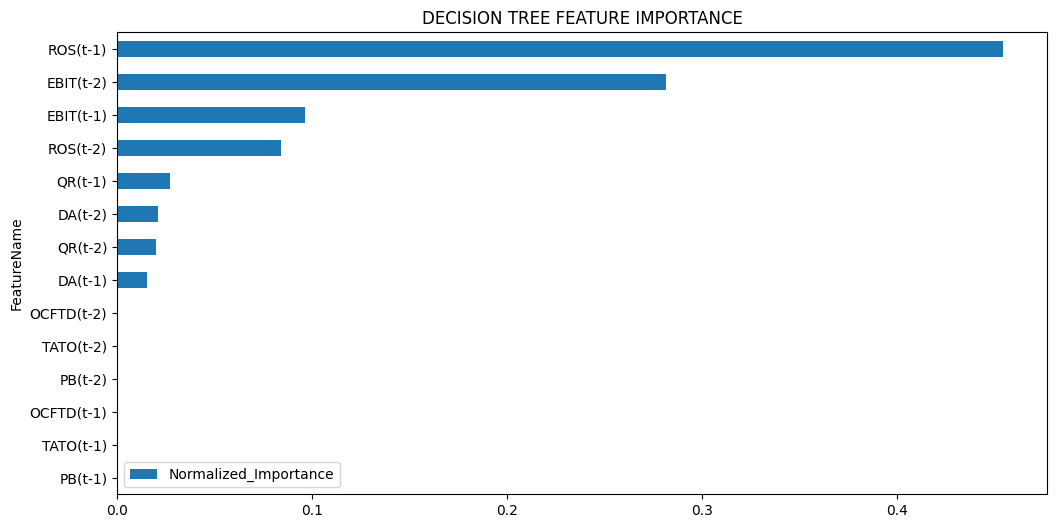

In [287]:
import lightgbm as lgb

model = DecisionTreeClassifier(max_depth = 4,
                          max_features = 'auto',
                          min_samples_split = 2,
                          random_state = 0,
                          class_weight = {0:.092, 1:.908},
                          )

model.fit(X_train,y_train)
importance_dt = model.feature_importances_
features_importances_dt = pd.DataFrame({'FeatureName': X_train.columns,
                                        'Feature Importance': importance_dt})
features_importances_dt['Normalized_Importance'] = features_importances_dt['Feature Importance']
features_importances_dt.sort_values(by=['Feature Importance'], ascending=False)

features_importances_dt.sort_values("Feature Importance", ascending=False).sort_values("Feature Importance").plot(figsize=(12,6),
                                                                             x="FeatureName",
                                                                             y=["Normalized_Importance"],
                                                                             kind="barh")
features_importances_dt
plt.title("Decision Tree Feature Importance".upper())


Text(0.5, 1.0, 'RANDOM FOREST FEATURE IMPORTANCE')

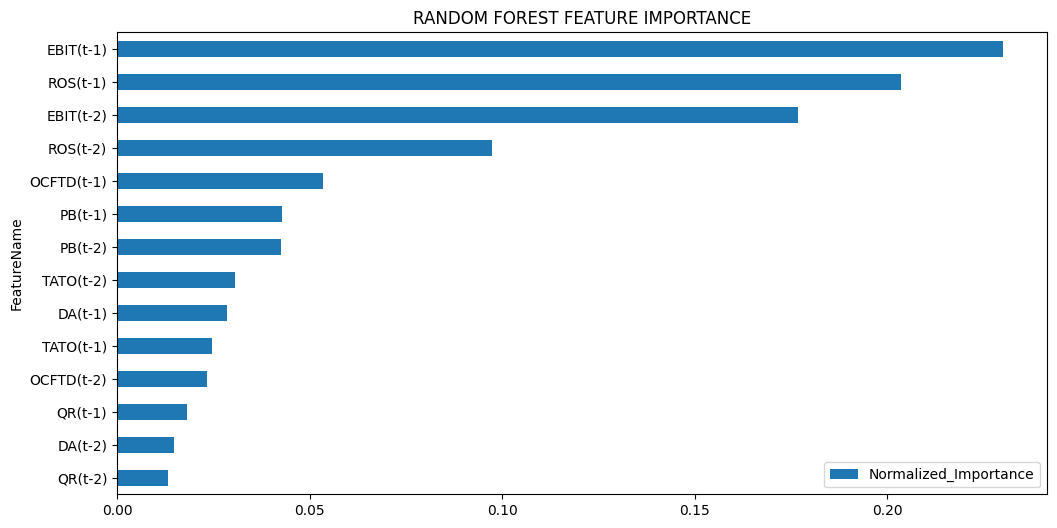

In [288]:
import lightgbm as lgb

model = RandomForestClassifier(random_state = 0,
                                         class_weight = {0:.092, 1:.908},
                                         criterion = 'gini',
                                         max_depth = 4,
                                         max_features = 'auto',
                                         min_samples_split = 4,
                                         n_estimators = 50)

model.fit(X_train,y_train)
importance_dt = model.feature_importances_
features_importances_dt = pd.DataFrame({'FeatureName': X_train.columns,
                                        'Feature Importance': importance_dt})
features_importances_dt['Normalized_Importance'] = features_importances_dt['Feature Importance']
features_importances_dt.sort_values(by=['Feature Importance'], ascending=False)

features_importances_dt.sort_values("Feature Importance", ascending=False).sort_values("Feature Importance").plot(figsize=(12,6),
                                                                             x="FeatureName",
                                                                             y=["Normalized_Importance"],
                                                                             kind="barh")
features_importances_dt
plt.title("Random Forest Feature Importance".upper())


Text(0.5, 1.0, 'XGBOOST FEATURE IMPORTANCE')

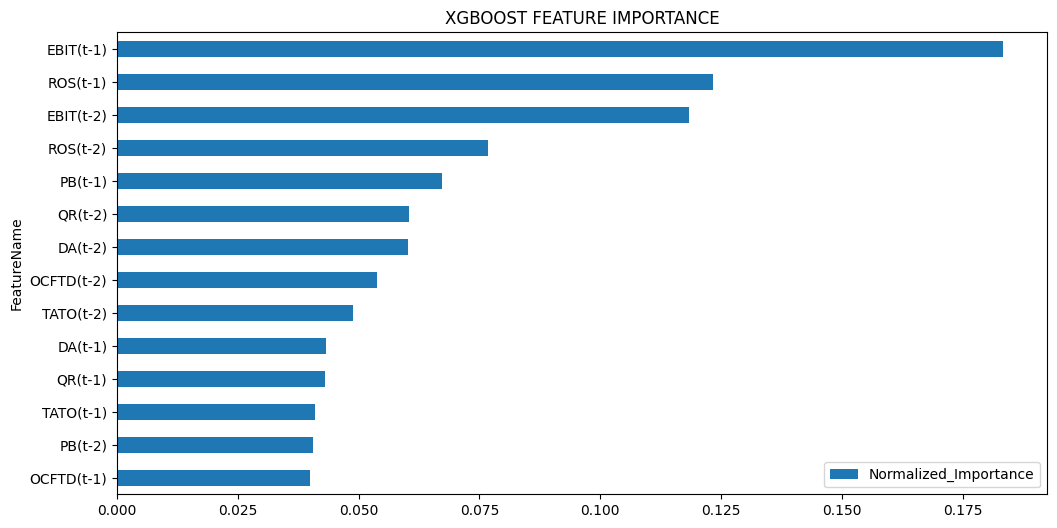

In [289]:
model = XGBClassifier(objective='binary:logistic', random_state=0,
                                         max_depth = 4,
                                         n_estimators = 50,
                                        scale_pos_weight = 9,
                                        subsample = 0.8,
                                        colsample_bytree = 0.8)

model.fit(X_train,y_train)
importance_dt = model.feature_importances_
features_importances_dt = pd.DataFrame({'FeatureName': X_train.columns,
                                        'Feature Importance': importance_dt})
features_importances_dt['Normalized_Importance'] = features_importances_dt['Feature Importance']
features_importances_dt.sort_values(by=['Feature Importance'], ascending=False)

features_importances_dt.sort_values("Feature Importance", ascending=False).sort_values("Feature Importance").plot(figsize=(12,6),
                                                                             x="FeatureName",
                                                                             y=["Normalized_Importance"],
                                                                             kind="barh")
features_importances_dt
plt.title("XGBoost Feature Importance".upper())